In [52]:
from sklearn.linear_model import LogisticRegression

In [84]:
import os
from pathlib import Path
import pandas as pd
train = pd.read_pickle(os.path.join(str(Path(os.getcwd())) , 'data/train.pickle'))

In [54]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [55]:
len(train['features'])

34799

In [56]:
import numpy as np
X =np.reshape(train['features'], (len(train['features']),-1))

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, train['labels'], test_size=0.25, random_state=42)

In [58]:
clf = LogisticRegression(random_state=0).fit(X_train,y_train)

/Users/21311064/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


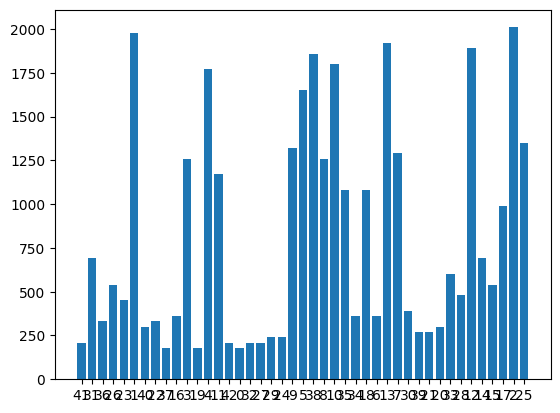

In [61]:
import collections, numpy
D = collections.Counter(train['labels'])
import matplotlib.pyplot as plt


plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))

plt.show()
#посмотрим на распределение классов

In [62]:
#видно, что классы распределены не равномерно, посмотрим на accuracy
clf.score(X_test,y_test)

0.9142528735632184

In [63]:
y_pred = clf.predict(X_test)

In [64]:
#в микро усреднении вклад маленького класса в общую метрику незаметный, а в макро величины классы нормированы
#можем заметить, что micro и macro precision почти одинаков, значит модель хорошо обучена и способна предсказывать как меньшие, 
#так и более крупные классы схожим образом
#заметим еще что accuracy примерно равен precision, это значит что доля верно предсказанных объектов примерно равна
#доле правильно предсказанных положительных объектов среди всех объектов, предсказанных положительным классом, что логично, так
# как macro примерно равен micro
from sklearn.metrics import precision_score
print(f"macro precision_score - {precision_score(y_test, y_pred, average='macro')}, micro precision_score - {precision_score(y_test, y_pred, average='micro')}")

macro precision_score - 0.910931610823652, micro precision_score - 0.9142528735632184


In [66]:
# посмотрим еще на recall и поймем, что ложно отрицательных срабатываний ложно мало и 
# micro и macro отличаются немного, значит есть небольшой перекос
# в сторону ложно отрицательных срабатываний для классов маленькой мощности(то есть модель иногда не угадывает их)
from sklearn.metrics import recall_score
print(f"macro recall_score - {recall_score(y_test, y_pred, average='macro')}, micro recall_score - {recall_score(y_test, y_pred, average='micro')}")

macro recall_score - 0.8818365373869322, micro recall_score - 0.9142528735632184


In [67]:
# в качетсве итоговой метрики можно выбрать (F1 macro + F1 micro)/2
from sklearn.metrics import f1_score
print((f1_score(y_test, y_pred, average='macro')+f1_score(y_test, y_pred, average='micro'))/2)

0.904384617225155


In [68]:
d = {}
for i,label in enumerate(y_test):
    if label!=y_pred[i]:
        if label not in d.keys():
            d[label] = 0
        d[label]+=1
print(f"модель чаще всего путает класс {max(d, key=d.get)}")

модель чаще всего пута класс 5


In [69]:
#2
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
neigh_pred = neigh.predict(X_test)

In [70]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(X_train,y_train)
GNBclf_pred = GNBclf.predict(X_test)

In [71]:
from sklearn import svm
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train,y_train)
linear_svc_pred = linear_svc.predict(X_test)

In [72]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)
rbf_svc_pred = linear_svc.predict(X_test)

In [74]:
polynomial_svc = svm.SVC(kernel='poly')
polynomial_svc.fit(X_train,y_train)
polynomial_svc_pred = linear_svc.predict(X_test)

In [75]:
print(f"метрика log reg {(f1_score(y_test, y_pred, average='macro')+f1_score(y_test, y_pred, average='micro'))/2}")
print(f"метрика knn {(f1_score(y_test, neigh_pred, average='macro')+f1_score(y_test, neigh_pred, average='micro'))/2}")
print(f"метрика GaussianNB {(f1_score(y_test, GNBclf_pred, average='macro')+f1_score(y_test, GNBclf_pred, average='micro'))/2}")
print(f"метрика svm linear {(f1_score(y_test, linear_svc_pred, average='macro')+f1_score(y_test, linear_svc_pred, average='micro'))/2}")
print(f"метрика svm rbf {(f1_score(y_test, rbf_svc_pred, average='macro')+f1_score(y_test, rbf_svc_pred, average='micro'))/2}")
print(f"метрика svm polynomial {(f1_score(y_test, polynomial_svc_pred, average='macro')+f1_score(y_test, polynomial_svc_pred, average='micro'))/2}")

метрика log reg 0.904384617225155
метрика knn 0.8726585627327713
метрика GaussianNB 0.17551285326560973
метрика svm linear 0.9532219968549209
метрика svm rbf 0.9532219968549209
метрика svm polynomial 0.9532219968549209


In [78]:
# наивный байесовский классификатор заметно хуже всех
# потому что наивный байесовский классификатор предполагает, что все признаки являются независимыми друг от друга
# а наши признаки - точно имеют зависимость, так как это картинки и очевидно, координаты зависят друг от друга
